# College Student Mental Health Story #

Mental health is a prominent ailment society has increasingly faced over time especially over the last decade or two with the growth of technology, social media and health care, among others. Many of us have battled it on a personal level or at least know of someone who has. I am one of those people who has battled with it espeically when I was in college. As one may know, mental health is not a one sized fits all type of ordeal. It can be specific to a certain person or group of people. With that said, trend analysis is a strong approach to take to understand mental health in the context of college students and from there, understand what actionable steps could be introduced to achieve better solutions. Let's dive in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read file in + show head 
file = 'Student Mental Health.csv'
data = pd.read_csv(file)
df = pd.DataFrame(data)
#df.head()

In [3]:
#df.isna().sum()

In [4]:
#df.dtypes

In [5]:
print('There are', len(df.index), 'student responses in this dataset. The sample size is a fair amount so trends in the data should exist.')

There are 101 student responses in this dataset. The sample size is a fair amount so trends in the data should exist.


In [6]:
# Tweak the "Your current year of Study" field so all values are numeric (1 = Freshman... 4 = Senior)
# Tweak the other fields so all values are binary (1 = Yes, 0 = No)

df['Your current year of Study'] = df['Your current year of Study'].str[-1:]

def to_binary(d):
    if d=='Yes':return 1
    if d=='No':return 0
    
df['Marital status'] = df['Marital status'].apply(to_binary)
df['Do you have Depression?'] = df['Do you have Depression?'].apply(to_binary)
df['Do you have Anxiety?'] = df['Do you have Anxiety?'].apply(to_binary)
df['Do you have Panic attack?'] = df['Do you have Panic attack?'].apply(to_binary)
df['Did you seek any specialist for a treatment?'] = df['Did you seek any specialist for a treatment?'].apply(to_binary)

## Gender Focused Deep Dive ##

In [7]:
df.groupby('Choose your gender')['Do you have Depression?'].agg(sum)

Choose your gender
Female    29
Male       6
Name: Do you have Depression?, dtype: int64

In [8]:
df.groupby('Choose your gender')['Do you have Anxiety?'].agg(sum)

Choose your gender
Female    24
Male      10
Name: Do you have Anxiety?, dtype: int64

In [9]:
df.groupby('Choose your gender')['Do you have Panic attack?'].agg(sum)

Choose your gender
Female    25
Male       8
Name: Do you have Panic attack?, dtype: int64

In [10]:
df.groupby('Choose your gender')['Did you seek any specialist for a treatment?'].agg(sum)

Choose your gender
Female    5
Male      1
Name: Did you seek any specialist for a treatment?, dtype: int64

Observations:
1. Females reported being depressed almost 5 times more than males. 35/101 students reported being depressed.
2. Females reported having anxiety almost 2.5 times more than males. 34/101 students reported having anxiety.
3. Females reported having had a panic attack almost 3 times more than males. 33/101 students reported having had a panic attack.
4. Females reported having sought a specialist for treatment almost 5 times more than males. Albeit, the sample size is small. 6/101 students reported seeking a specialist for treatment.

Questions:

1. Are male students underreporting? This is a vital question, but it is one that cannot be answered by solely leveraging this dataset. 
2. Roughly 1/3 of students reported some degree of having a mental health ailment but only 6 sought specialzied help... is there a stigma around seeking help? Again, this also cannot be answered by solely leveraging this dataset, but it is a vital question. 
3. Does mental health affect certain majors or ages? This would be interesting to know. 
4. Is there overlap between the conditions? 

Let's explore!

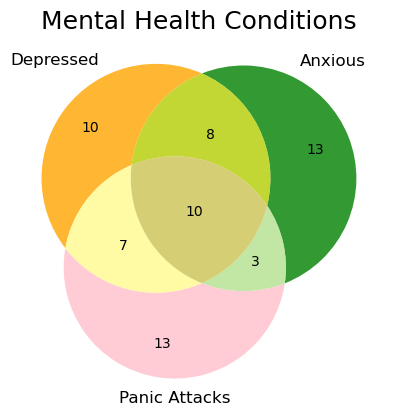

In [11]:
depressed = df[(df['Do you have Depression?']==1)]
anxious = df[(df['Do you have Anxiety?']==1)]
panic_attacks = df[(df['Do you have Panic attack?']==1)]

venn3(subsets = [set(depressed.index), 
                 set(anxious.index), 
                 set(panic_attacks.index)], 
      set_labels = ('Depressed', 'Anxious', 'Panic Attacks'),
      set_colors = ('orange', 'green', 'pink'),
      alpha = 0.8)

plt.title('Mental Health Conditions', fontsize=18)
plt.show()

## Age/Year Focused Deep Dive ##

In [12]:
df.groupby('Age')[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].agg(sum)

,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
Age,,,
18.0,11,14,9
19.0,9,5,9
20.0,3,3,1
21.0,0,2,0
22.0,1,0,0
23.0,5,2,5
24.0,6,8,9


In [13]:
df.groupby('Your current year of Study')[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].agg(sum)

,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
Your current year of Study,,,
1,14,14,14
2,10,10,8
3,10,8,10
4,1,2,1


The tables are quite telling. Objectively, we observe that young and old students reported a mental health related ailment. Students in their fourth year stand out. The experiences they have in years 1-3 may result in a more stable, comfortable foundation.

For new students, the adjustment from high school to college is a significant one.

For old students, maybe it is tied to the stress of getting ready to graduate and find a job or maybe it is tied to the stress of graduate school?

<Axes: xlabel='What is your course?'>

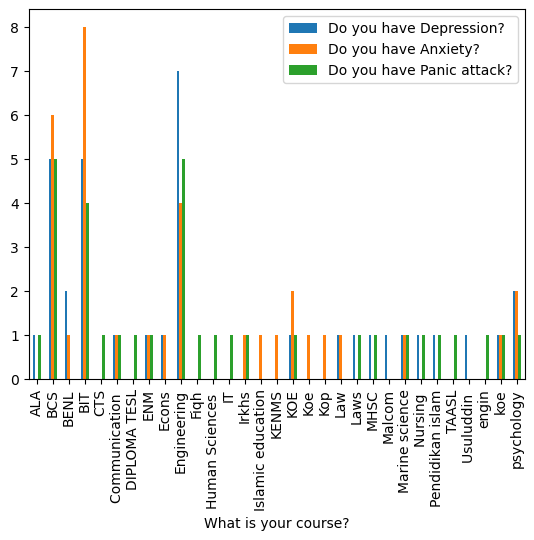

In [14]:
df2 = df.groupby('What is your course?')[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].agg(sum)
df2 = df2.loc[(df2).any(1), (df2!=0).any(0)]
df2.plot(kind='bar')

We observe that three majors make up much of the reported mental health cases - Engineering, BCS, and BIT. An interesting find! While these three majors tend to be robust and challenging, perhaps students also be not be receiving enough resources to succeed? Perhaps colleges may need to reconsider how they develop each major's curriculum?

## Comprehension Beyond Dataset ##

While this dataset is particular to the 101 sampled students, telling trends are observed from varying angles. Many of these trends can be projected to students beyond those sampled in this dataset. It starts with encouraging young people to be open to conversations regarding mental health. We must better understand why females are affected more than males and then we must provide better resources to these students to better aid them through their respective challenging times.